In [12]:
from scipy.ndimage import watershed_ift
from skimage.segmentation import watershed
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_closing, binary_opening
from skimage.measure import label

from src.data.monuseg.tf_data import get_dataset 

In [2]:
result = np.load("/home/valentin/python_wkspce/2d_bispectrum_cnn/test.npy")


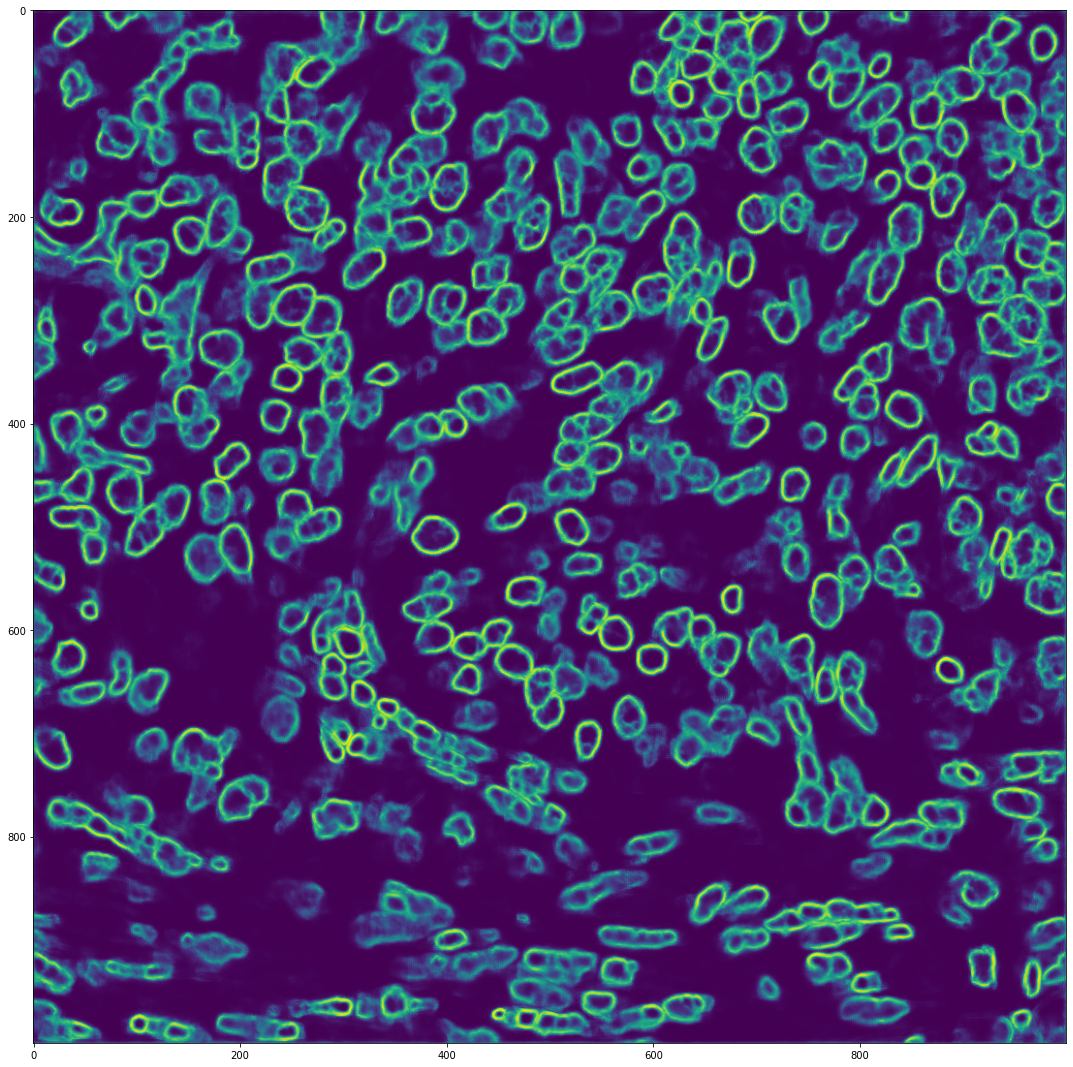

In [29]:
plt.figure(figsize=(19, 19))
# plt.imshow(binary_opening(result[0, :, :, 1] > 0.5,structure=np.ones((3,3)),  iterations=2))
plt.imshow(result[0, :, :, 1])


In [30]:
result.shape

(4, 1000, 1000, 3)

In [18]:
def predict_monuseg(y_pred):
    y_pred_quantized = np.zeros_like(y_pred, dtype=np.uint8)
    y_pred_quantized[..., 1] = (y_pred[..., 1] * 255).astype(np.uint8)
    y_pred_quantized[..., 0] = (y_pred[..., 0] > 0.5).astype(np.uint8)
    y_pred_quantized[..., 2] = (y_pred[..., 2] > 0.5).astype(np.uint8)
    y_pred_quantized[y_pred[..., 1] < 0.2] = 0
    batch_size = y_pred.shape[0]
    output = list()
    for s in range(batch_size):
        markers = label(binary_opening(y_pred_quantized[s, :, :, 0], structure=np.ones((3,3)), iterations=2))
        markers[y_pred_quantized[s, :, :, 2] != 0] = -1
        output.append(
            watershed_ift((y_pred_quantized[s, :, :, 1]).astype(np.uint8),
                          markers))
    return np.stack(output, axis=0)

In [19]:
y_pred = predict_monuseg(result)

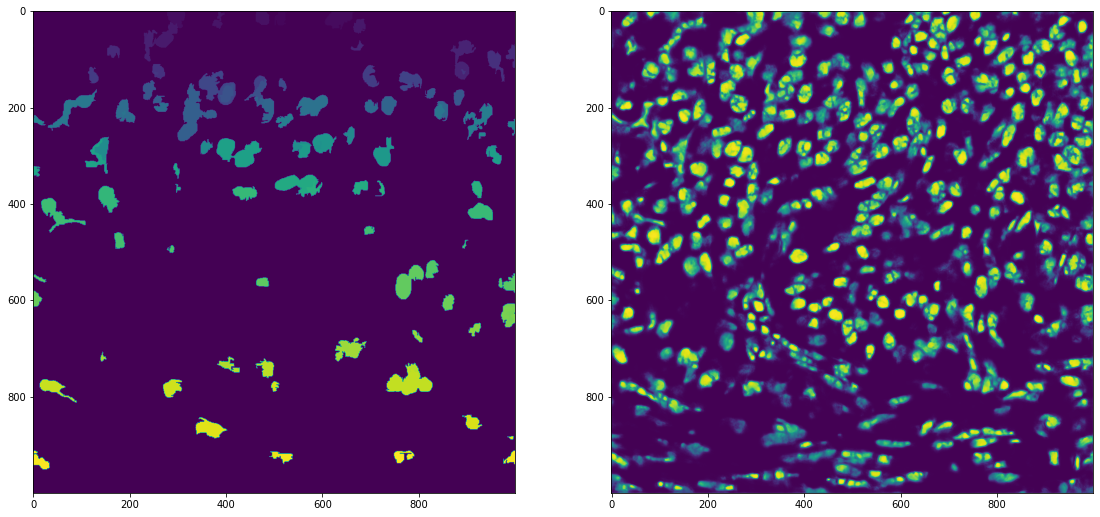

In [26]:
plt.figure(figsize=(19, 19))
plt.subplot(1, 2, 1)
plt.imshow(y_pred[0, ...])
plt.subplot(1, 2, 2)
plt.imshow(result[0, :, :, 0])


In [ ]:
ds = get_dataset().as_numpy_iterator()

In [ ]:
x, y = next(ds)
x = x[:256,:256,:]
y = y[:256,:256,:]

In [ ]:
plt.imshow(y)

In [ ]:
y_foreground = y[...,0]

In [ ]:
plt.imshow(binary_erosion(y_foreground).astype(int))
plt.colorbar()

In [ ]:
plt.imshow((y[..., 1] * 255).astype(np.uint8))
plt.colorbar()

In [ ]:
markers = label(binary_erosion(y_foreground, selem=np.ones((7,7))))
markers[y[...,2]==1] = -1
y_pred = watershed_ift((y[..., 1]).astype(np.uint8), markers)


In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(y_pred+ 100 * y[..., 1])
plt.colorbar()


In [ ]:
np.sum(y_pred - markers)

In [ ]:
plt.figure(figsize=(9, 9))
plt.imshow((y[..., 1] * 255 + y[..., 2] * 100).astype(np.uint8))
